In [1]:
import numpy as np
import pandas as pd
import tweepy as tw
import csv
from csv import writer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import preprocessor as preprocess_tweet
import snscrape.modules.twitter as sntwitter
import nltk
import regex as re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Twitter API

In [ ]:
consumer_key= 'askforit'
consumer_secret= 'askforit'
access_token= 'askforit'
access_token_secret= 'askforit'

In [ ]:
# Authenticate with twitter portal
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [18]:
# file of US cities 
cities = pd.read_csv("Book2.csv",names = ["C","A"])
cities.drop('A',inplace=True, axis=1)

#file of UAE cities 
cities = pd.read_csv("Book1.csv")

#file of Singapore cities 
cities = pd.read_csv("Book5.csv")

# Function to extract tweets using snscarper

In [19]:
def create_csv2(fname, search_words, date,mode):
    #search_words+='Depression,depression'
    with open('%s.csv' % (fname), mode, encoding="utf-8", newline='') as file:
             # Initialize an instance of csv file
        if mode == 'w':
            myfile = csv.writer(file)
            myfile.writerow(['Username','timestamp', 'tweet_text','Location'])# Set the columns of csv file we need
        else:
            myfile = writer(file)
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_words + date).get_items()):
            if i > 5000:
                break
                # Write each tweet as a row with its timestamp, the tweet text and the hashtags present in that tweet
            for l in cities["C"]:
                if l in tweet.user.location:
                    myfile.writerow([tweet.user,tweet.date,  tweet.content.replace('\n',' ').encode('utf-8'),tweet.user.location])
                    break

# Cleaning data

In [7]:
# This function takes in a single tweet as input in the form of a string. We then use preprocessor library to remove URLs,
# any mentions, hashtags, numbers and emojis from the tweet. 
def clean_tweet(tweet):
    preprocess_tweet.set_options(preprocess_tweet.OPT.URL,
                                preprocess_tweet.OPT.MENTION,
                                preprocess_tweet.OPT.HASHTAG,
                                preprocess_tweet.OPT.RESERVED,
                                preprocess_tweet.OPT.NUMBER,
                                preprocess_tweet.OPT.EMOJI,
                                preprocess_tweet.OPT.SMILEY
                                )

    # During data collection, emojis inside tweets were stored as hexadecimal values which could not be filtered via the
    # preprocessor library. Thus we have defined a while loop that looks for the start of a hexadecimal value using forward
    # slah and then slice the tweet to remove the 4 characters starting from the first forward slash encountered. This 
    # removes all hexadecimal values that represent emojis in the tweet.
    while ("\\" in tweet):
        idx= tweet.index("\\")
        tweet = tweet[:idx]+tweet[idx+4:]
        
    tweet = tweet.lower()      # Convert all tweets to lowercase
    tweet = preprocess_tweet.clean(tweet)     # Remove the above set options from the tweet
    tweet = tweet.replace("\n", " ").strip() # Remove newline characters from the tweet and replace them with empty strings
    return tweet     # Return the cleaned and preprocessed tweet

In [8]:
# function to clean file 
def clean_df(filename):
    df = pd.read_csv(filename)     # Read the csv file
    #df.drop(['timestamp'],inplace=True,axis=1)    # Drop columns that are not required
    for i in range(len(df)):
        df.at[i,"tweet_text"] = clean_tweet(df.at[i,"tweet_text"][2:-2])     # Replace each tweet with its cleaned version
    return df     # Return the cleaned dataset

In [86]:
# give dates and mode to function 

date = ['since:2019-02-01 until:2019-02-28','since:2019-03-01 until:2019-03-31','since:2019-04-01 until:2019-04-30', 'since:2020-03-01 until:2020-03-31', 'since:2020-04-01 until:2020-04-30','since:2020-05-01 until:2020-05-31','since:2021-01-01 until:2021-01-31','since:2021-02-01 until:2021-02-28','since:2021-03-01 until:2021-03-31','since:2022-01-01 until:2022-01-31','since:2022-02-01 until:2022-02-28','since:2022-03-01 until:2022-03-31']
m = ['w','a','a','a','a','a','a','a','a','a','a','a']

# Tweets Extraction 

In [25]:
# file for Schizophrenia in USA 
for i in range(0,len(m)):
    create_csv2('Schizophrenia_url', "'Schizophrenia'",date[i],m[i])
    create_csv2('Depression_url', "'depression'",date[i],m[i])
    create_csv2('Bipolar_url', "'bipolar'",date[i],m[i])
    
file for Schizophrenia in UAE
for i in range(0,len(m)):
    create_csv2('SchizophreniaUAE_url', "'Schizophrenia'",date[i],m[i])
    create_csv2('DepressionUAE_url', "'depression'",date[i],m[i])
    create_csv2('BipolarUAE_url', "'bipolar'",date[i],m[i])
    
file for Schizophrenia in Singapore  
for i in range(0,len(m)):
    create_csv2('SchizophreniaSG_url', "'Schizophrenia'",date[i],m[i])
    create_csv2('DepressionSG_url', "'depression'",date[i],m[i])
    create_csv2('BipolarSG_url', "'bipolar'",date[i],m[i])

# File cleaning

In [87]:
#clean the file 

#US
Schizophrenia = clean_df('Schizophrenia.csv')
Depression = clean_df('Depression.csv')
Bipolar = clean_df('Bipolar_url.csv')

#UAE
SchizophreniaUAE = clean_df('SchizophreniaUAE.csv')
DepressionUAE = clean_df('DepressionUAE.csv')
BipolarUAE = clean_df('BipolarUAE.csv')

#Singapore 
SchizophreniaSG = clean_df('SchizophreniaSG.csv')
DepressionSG = clean_df('DepressionSG.csv')
BipolarSG = clean_df('BipolarSG.csv')


In [88]:
Schizophrenia.head()

,timestamp,tweet_text,Location
0,2019-02-27 23:54:58+00:00,nicotine metabolized into cotinine which studi...,"Issaquah, WA"
1,2019-02-27 23:45:36+00:00,we use to call this schizophrenia.,"Boston, MA"
2,2019-02-27 23:44:09+00:00,studies have hinted that growing up with a lac...,"Washington, DC"
3,2019-02-27 23:17:01+00:00,"in addition, we actually do have good research...","Connecticut, USA"
4,2019-02-27 23:15:21+00:00,healthy lifestyle top schizophrenia youtube ch...,"Chicago, IL"


In [89]:
# Remove duplicate tweets from the dataframe
#US
Schizophrenia.drop_duplicates(subset=['tweet_text'], inplace=True)   
Depression.drop_duplicates(subset=['tweet_text'], inplace=True) 
Bipolar.drop_duplicates(subset=['tweet_text'], inplace=True) 

#Singapore
SchizophreniaSG.drop_duplicates(subset=['tweet_text'], inplace=True)   
DepressionSG.drop_duplicates(subset=['tweet_text'], inplace=True) 
BipolarSG.drop_duplicates(subset=['tweet_text'], inplace=True) 

#UAE
SchizophreniaUAE.drop_duplicates(subset=['tweet_text'], inplace=True)   
DepressionUAE.drop_duplicates(subset=['tweet_text'], inplace=True) 
BipolarUAE.drop_duplicates(subset=['tweet_text'], inplace=True) 

In [13]:
# Download the stopwords to remove from our tweets from the preprocessed tweets
nltk.download('stopwords')   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Summaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
# Converting clean files to csv file 
#US
Schizophrenia.to_csv("clean_Schizophrenia.csv")
Depression.to_csv('clean_Depression.csv')
Bipolar.to_csv("clean_Bipolar.csv")

#UAE
SchizophreniaUAE.to_csv("clean_SchizophreniaUAE.csv")
DepressionUAE.to_csv('clean_DepressionUAE.csv')
BipolarUAE.to_csv("clean_BipolarUAE.csv")

#SINGAPORE
SchizophreniaSG.to_csv("clean_SchizophreniaSG.csv")
DepressionSG.to_csv('clean_DepressionSG.csv')
BipolarSG.to_csv("clean_BipolarSG.csv")

In [90]:
Schizophrenia

,timestamp,tweet_text,Location
0,2019-02-27 23:54:58+00:00,nicotine metabolized into cotinine which studi...,"Issaquah, WA"
1,2019-02-27 23:45:36+00:00,we use to call this schizophrenia.,"Boston, MA"
2,2019-02-27 23:44:09+00:00,studies have hinted that growing up with a lac...,"Washington, DC"
3,2019-02-27 23:17:01+00:00,"in addition, we actually do have good research...","Connecticut, USA"
4,2019-02-27 23:15:21+00:00,healthy lifestyle top schizophrenia youtube ch...,"Chicago, IL"
...,...,...,...
21251,2022-03-19 05:21:00+00:00,what symptoms would a client with schizophreni...,"New York, US"
21253,2022-03-19 05:19:58+00:00,i cant imagine what youre going through- a con...,"Chicago, IL/ Detroit"
21254,2022-03-19 05:13:56+00:00,reply to: there are a few ways that theorists ...,"Scottsdale, AZ"
21255,2022-03-19 04:57:11+00:00,me with schizophreni,"Queens, NY"


# Filtering dataset

In [91]:
substring = [" i "," me "," myself "," my "," mine "]
def filtering(file):
    text = []
    time=[]
    url=[]
    i=0
    count = -1
    for line in file["tweet_text"]:
        count = count+1
        for i in substring:
            if i in line:
               # print("Found!")
                time.append(file.iloc[count, 1])
                #print(file.iloc[0:count])
                text.append(line)
                url.append(file.iloc[count,0])
                break
        
    return (text,time,url)

In [97]:
# calling the filtering function to filter tweets related to people having mental health problems 

#US
text,time,url  = filtering(Schizophrenia) 
Schizophrenia21= pd.DataFrame(text)
Schizophrenia21['timestamp'] = time
Schizophrenia21['username'] = url
#Schizophrenia21.to_csv('clean_Schizophrenia2_url.csv',index=False) #2 files have been craeted using this line (1: 'clean_Schizophrenia2.csv' and 2:"clean_Schizophrenia2_url.csv") 

text,time,url  = filtering(Depression)
Depression21= pd.DataFrame(text)
Depression21['timestamp'] = time
Depression21['username'] = url
#Depression21.to_csv('clean_Depression2_url.csv')

text,time,url  = filtering(Bipolar)
Bipolar21= pd.DataFrame(text)
Bipolar21['timestamp'] = time
Bipolar21['username'] = url
#Bipolar21.to_csv("clean_Bipolar2_url.csv")

#UAE
text,time,url  = filtering(SchizophreniaUAE)
Schizophrenia21_UAE= pd.DataFrame(text)
Schizophrenia21_UAE['timestamp'] = time
Schizophrenia21_UAE['username'] = url
#Schizophrenia21_UAE.to_csv('clean_SchizophreniaUAE2_url.csv',index=False)

text,time,url  = filtering(DepressionUAE)
Depression21_UAE= pd.DataFrame(text)
Depression21_UAE['timestamp'] = time
Depression21_UAE['username'] = url
#Depression21_UAE.to_csv('clean_DepressionUAE2_url.csv')

text,time,url  = filtering(BipolarUAE)
Bipolar21_UAE= pd.DataFrame(text)
Bipolar21_UAE['timestamp'] = time
Bipolar21_UAE['username'] = url
#Bipolar21_UAE.to_csv("clean_BipolarUAE2_url.csv")

#SINGAPORE
text,time,url  = filtering(SchizophreniaSG)
Schizophrenia21_SG= pd.DataFrame(text)
Schizophrenia21_SG['timestamp'] = time
Schizophrenia21_SG['username'] = url
#Schizophrenia21_SG.to_csv('clean_SchizophreniaSG2_url.csv',index=False)

text,time,url = filtering(DepressionSG)
Depression21_SG= pd.DataFrame(text)
Depression21_SG['timestamp'] = time
Depression21_SG['username'] = url
#Depression21_SG.to_csv('clean_DepressionSG2_url.csv')

text,time,url = filtering(BipolarSG)
Bipolar21_SG= pd.DataFrame(text)
Bipolar21_SG['timestamp'] = time
Bipolar21_SG['username'] = url
#Bipolar21_SG.to_csv("clean_BipolarSG2_url.csv")

In [93]:
Schizophrenia21

,0,timestamp,username
0,"i be yelling memes to myself on the regular, i...","i be yelling memes to myself on the regular, i...",2019-02-27 22:10:35+00:00
1,everything alex says i can think of alternate ...,everything alex says i can think of alternate ...,2019-02-27 21:13:52+00:00
2,also draws the connection i was making between...,also draws the connection i was making between...,2019-02-27 20:29:18+00:00
3,"i mean, i donexpect to be able to fit, ""pengui...","i mean, i donexpect to be able to fit, ""pengui...",2019-02-27 18:24:33+00:00
4,i was wondering that too. i was all on board (...,i was wondering that too. i was all on board (...,2019-02-27 18:17:54+00:00
...,...,...,...
5597,your schizophrenia must really be kicking in b...,your schizophrenia must really be kicking in b...,2022-03-19 13:40:58+00:00
5598,literally everyone: weeds gonna make ur schizo...,literally everyone: weeds gonna make ur schizo...,2022-03-19 13:08:07+00:00
5599,"i feel like i'm pretty dead on this bird app, ...","i feel like i'm pretty dead on this bird app, ...",2022-03-19 11:44:31+00:00
5600,"march , - my life: long story short: i had a m...","march , - my life: long story short: i had a m...",2022-03-19 05:29:48+00:00


# Sentiment Analysis 

## Textblob

In [94]:
def text_blob(file):
    target_tb = []     # This array will store the polarity calculated using TextBlob
    for i in range(len(file)):    # For each tweet we run error handling as incase a read fails, if yes we set its polarity as 0
        try:
            text = file.at[i,0]
        except:
            target_tb.append(0)
            continue
        text =TextBlob(text)     # Create a textblob object for our tweet
        text = text.sentiment.polarity     # Calculate the polarity of the tweet
        if(text<-0.1):     # If the polarity is less than -0.1 we assign it a negative label of -1
            target_tb.append(-1)
        elif(text>0.1):    # If the polarity is greater than 0.1 we assign it a positive label of 1
            target_tb.append(1)
        else:     ## If the polarity is between -0.1 and 0.1 we assign it a neutral label of 0
            target_tb.append(0)
    return target_tb

In [98]:
#US
target_tb_US_S= text_blob(Schizophrenia21) 
target_tb_US_D= text_blob(Depression21) 
target_tb_US_B= text_blob(Bipolar21) 

#UAE
target_tb_UAE_S= text_blob(Schizophrenia21_UAE) 
target_tb_UAE_D= text_blob(Depression21_UAE) 
target_tb_UAE_B= text_blob(Bipolar21_UAE) 

#SINGAPORE
target_tb_SG_S= text_blob(Schizophrenia21_SG) 
target_tb_SG_D= text_blob(Depression21_SG) 
target_tb_SG_B= text_blob(Bipolar21_SG) 

In [114]:
target_tb_US_S

[0,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 -1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 -1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 0,
 1,
 -1,
 0,
 1,
 0,
 1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 0,


## Vader

In [100]:
def vader(file):
    target_vader =[]     # We define an empty array that will store the polarity calculated using Vader
    sid_obj= SentimentIntensityAnalyzer()    # Create an instance of the vader sentiment analyser
    for i in range(len(file)):     # For each tweet we run error handling as incase a read fails, if yes we set its polarity as 0
        try:
            text = file.at[i,0]
        except:
            target_vader.append(0)
            continue
        v_polarity = sid_obj.polarity_scores(file.at[i,0])      # Get the polarity scores of each tweet
        if(v_polarity["compound"]<-0.1):     # If the combined polarity is lesser than -0.1, we assign it a negative label of -1
            target_vader.append(-1)
        elif(v_polarity["compound"]>0.1):    # If the combined polarity is greater than 0.1, we assign it a negative label of 1
            target_vader.append(1)
        else:     # If the combined polarity is between -0.1 and 0.1, we assign it a neutral label of 0
            target_vader.append(0)
    return target_vader

In [101]:
#US
target_vader_US_S = vader(Schizophrenia21)
target_vader_US_D = vader(Depression21)
target_vader_US_B = vader(Bipolar21)

#UAE
target_vader_UAE_S = vader(Schizophrenia21_UAE)
target_vader_UAE_D = vader(Depression21_UAE)
target_vader_UAE_B = vader(Bipolar21_UAE)

#Singapore
target_vader_SG_S = vader(Schizophrenia21_SG)
target_vader_SG_D = vader(Depression21_SG)
target_vader_SG_B = vader(Bipolar21_SG)

[-1, -1, -1, 1, -1, -1, 1, 1]

In [201]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
def spacy(file):
    target_spacy =[]     # We define an empty array that will store the polarity calculated using Vader
    for i in range(len(file)):     # For each tweet we run error handling as incase a read fails, if yes we set its polarity as 0
        try:
            text = file.at[i,0]
        except:
            target_spacy.append(0)
            continue
            #doc = nlp(file.at[i,0])
        s_polarity = nlp._.polarity(file.at[i,0])      # Get the polarity scores of each tweet
        if(s_polarity["compound"]<-0.1):     # If the combined polarity is lesser than -0.1, we assign it a negative label of -1
            target_spacy.append(-1)
        elif(s_polarity["compound"]>0.1):    # If the combined polarity is greater than 0.1, we assign it a negative label of 1
            target_spacy.append(1)
        else:     # If the combined polarity is between -0.1 and 0.1, we assign it a neutral label of 0
            target_spacy.append(0)
    return target_spacy

In [218]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
text = "i want to kill myself"
doc = nlp(text)
 
print(doc._.polarity)

0.0


In [202]:
spacy_s = spacy(Schizophrenia21)

In [203]:
spacy_s

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
#We are considering vader as it gives less neutral polarity to texts. 

#US
Schizophrenia21['target'] = target_vader_US_S
Depression21['target'] = target_vader_US_D
Bipolar21['target'] = target_vader_US_B

#UAE
Schizophrenia21_UAE['target'] = target_vader_UAE_S
Depression21_UAE['target'] = target_vader_UAE_D
Bipolar21_UAE['target'] = target_vader_UAE_B

#SG
Schizophrenia21_SG['target'] = target_vader_SG_S
Depression21_SG['target'] = target_vader_SG_D
Bipolar21_SG['target'] = target_vader_SG_B



In [291]:
# Appending target column into dataset  
#US
Schizophrenia21.to_csv("clean_Schizophrenia2.csv")
Depression21.to_csv('clean_Depression2.csv')
Bipolar21.to_csv("clean_Bipolar2.csv")

#UAE
Schizophrenia21_UAE.to_csv("clean_Schizophrenia2_UAE.csv")
Depression21_UAE.to_csv('clean_Depression2_UAE.csv')
Bipolar21_UAE.to_csv("clean_Bipolar2_UAE.csv")

#SINGAPORE
Schizophrenia21_SG.to_csv("clean_Schizophrenia2_SG.csv")
Depression21_SG.to_csv('clean_Depression2_SG.csv')
Bipolar21_SG.to_csv("clean_Bipolar2_SG.csv")

In [109]:
# Convert out target variable from Textblob and Vader to pandas dataframe for plotting and comparing with manually 
# labelled dataset

# this is done just to visualize the results of vader and textblob
#US
#sch 
sch_tb = pd.DataFrame(target_tb_US_S, columns = ['target_tb_US_S'])
sch_v = pd.DataFrame(target_vader_US_S, columns = ['target_vader_US_S'])

#dep
dep_tb = pd.DataFrame(target_tb_US_D, columns = ['target_tb_US_D'])
dep_v = pd.DataFrame(target_vader_US_D, columns = ['target_vader_US_D'])

#bip
bipolar_tb = pd.DataFrame(target_tb_US_B, columns = ['target_tb_US_B'])
bipolar_v = pd.DataFrame(target_vader_US_B, columns = ['target_vader_US_B'])

In [116]:
sch_tb.head()

,target_tb_US_S
0,0
1,1
2,1
3,1
4,-1


# BarChart 
## For comparing results

US datasets


Text(0.5, 1.0, 'Vader')

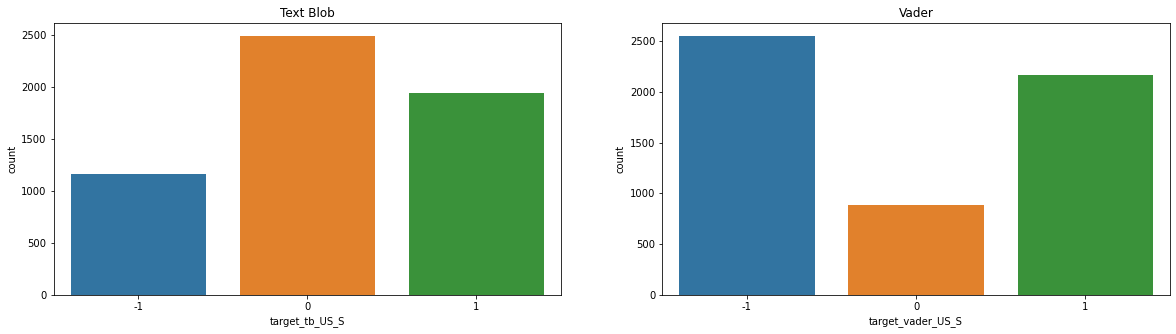

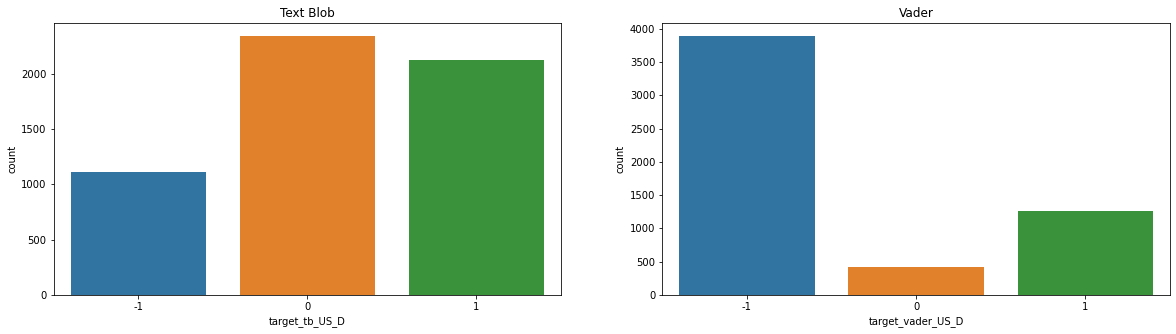

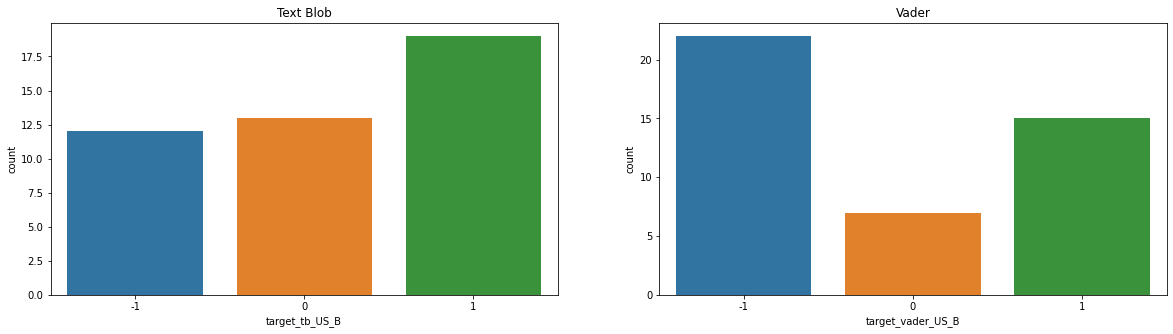

In [119]:
# Initialize subplots to show difference between target variables predicted by textblob, vader and manually labelled dataset
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
print("US datasets")
sns.countplot(ax=axes[0], x='target_tb_US_S', data = sch_tb)
axes[0].set_title("Text Blob")
sns.countplot(ax=axes[1], x='target_vader_US_S', data = sch_v)
axes[1].set_title("Vader")

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(ax=axes[0], x='target_tb_US_D', data = dep_tb)
axes[0].set_title("Text Blob")
sns.countplot(ax=axes[1], x='target_vader_US_D', data = dep_v)
axes[1].set_title("Vader")

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(ax=axes[0], x='target_tb_US_B', data = bipolar_tb)
axes[0].set_title("Text Blob")
sns.countplot(ax=axes[1], x='target_vader_US_B', data = bipolar_v)
axes[1].set_title("Vader")


##### We compared two techniques for checking polarity of the text. By comparing the US files, We can seeVader is providing much balanced polarity than textblob.  

# Tokenization and Stemming

In [122]:
# We defined a function that performs tokenization and lemmatization to further 
def gen_tokens(S):
    tokens = []     # Define an empty array to store the tokenized sentences
    ps = PorterStemmer()    # We will use porter stemmer for stemming out data
    for i in range(len(S)):        # Loop through each row of tweets
        tokenized = re.sub('[^a-zA-Z]',' ',S.iloc[i,0]).split()    # split each word using space as delimiter
        tokenized = [ps.stem(word) for word in tokenized if not word in set(stopwords.words('english'))]    # perform stemming and remove stopwords from the sentence
        tokenized = ' '.join(tokenized)     # combine the individual words of a sentence to form a sentence
        tokens.append(tokenized)        # add the tokenized sentence to the tokens array
    return tokens       # Return the tokens array containing tokenized sentences for the dataframe inputted

In [171]:
s = pd.read_csv("clean_Depression2_UAE.csv")

In [172]:
def t(file):
    return file[["0","target"]]

In [173]:
# dataframe for wordcloud
df1 = pd.DataFrame(t(s))
# df2 = pd.DataFrame(t(suae))
# df3 = pd.DataFrame(t(ssg))
# df4 = pd.DataFrame(t(d))
# df5 = pd.DataFrame(t(duae))
# df6 = pd.DataFrame(t(dsg))
# df7 = pd.DataFrame(t(b))
# df8 = pd.DataFrame(t(buae))
# df9 = pd.DataFrame(t(bsg))

In [174]:
tokens= gen_tokens(df1)
tokens


['listen loan northampton town burton albion brave spoke depress passeng journey',
 'doesnt understand trauma go get ignor realli doesnt help self esteem especi social anxieti depress im go sometim realli wanna shut get neglect hamda',
 'depress attack skip morn workout knew gonna regret amaz train session work natur endorphin',
 'two year go faster depress go whole new leve',
 'im use call blackhead thou depress dot',
 'woke morn depress ive long time went class ate healthi day help spread joy im fuck proud depress isnt gonna win time',
 'need yall stop think depress anyth yall crusti ass ill ive fight year take egotist need elsewher perioddd',
 'oh god noura compliment plastic surgeri plan cancel depress cure',
 'hour depress nap lmao get bed tonight probabl',
 'mayb increas sleep pattern sign depress mayb love sleep',
 'took break year depress back colleg well soo yeah',
 'took final start pull depress',
 'im eat tub ice cream make feel better hope late feel ugli weak late stop inte

# Vectorization 

In [176]:
cv = CountVectorizer()      # Use a count vectorizer model to convert our tokenized sentence to vector representations to feed into ML model
vec_token = []              # Define empty array that will store our feature vectors for our tokenized tweets
x1  = cv.fit_transform(tokens).toarray()        # Fit our tokenized tweets array of tokens to the Count Vectorizer model
vec_token.append(x1)        # Append the generated feature vectors to vec_token array to feed into classifiers

# Use a tfid vectorizer model to convert our tokenized sentence to vector representations to feed into ML model
tfid = TfidfVectorizer(analyzer='word')     # Initialize tfid vectorizer that analyses on a word level
tfidf_vec_token = []        # Define empty array that will store our feature vectors for our tokenized tweets
x1  = tfid.fit_transform(tokens).toarray()      # Fit our tokenized tweets array of tokens to the tfid Vectorizer model
tfidf_vec_token.append(x1)  # Append the generated feature vectors to vec_token array to feed into classifiers

# Use a Hashing vectorizer model to convert our tokenized sentence to vector representations to feed into ML model
hashv = HashingVectorizer(n_features=2**4)  # Initialize tfid vectorizer
hashv_vec_token = []        # Define empty array that will store our feature vectors for our tokenized tweets
x1 = hashv.fit_transform(tokens).toarray()      # Fit our tokenized tweets array of tokens to the Hashing Vectorizer model
hashv_vec_token.append(x1)  # Append the generated feature vectors to vec_token array to feed into classifiers

In [177]:
y = df1["target"].values     # Set y which contains our final sentiment. This is out target variable which contains the polarity label for each tweet

In [178]:
y

array([ 0, -1,  1, -1, -1,  1, -1,  1,  0,  0, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  1, -1, -1, -1,  1, -1,  1,  0, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1, -1], dtype=int64)

In [179]:
# This function takes in the vector tokens array as input, the target variable, and the test size for test train split as arguements for the function.
# This function then runs Naive Bayes, KNN, Decision Tree and Random Forest classifiers for the vector token supplied with the desired test size and returns the accuracy, F score, Precision and Recall of the model
# We defined this function to easily test different vectorizing techniques to analyse which classifers work best with which vectorizing algorithm.
# To test different vectorizing techniques, we simply pass an array that contains vectors from different vectorizing algorithms.
def run_models(vec_token, y, test_size):
    # Train Test & Split the data according to the ratio specified in the test_size arguement in the function
    xtrain, xtest, ytrain, ytest = train_test_split(vec_token[0], y, test_size=test_size, random_state=0)
    
    naivebayes = GaussianNB()      # Initialize a Naive Bayes Model
    y_pred = naivebayes.fit(xtrain, ytrain).predict(xtest)     # Fit our tokenized sentences array to the model and predict for test set
    print("Naive Bayes")
    score_summary(ytest,y_pred)     # Return the Accuracy, Precision, F-measure and Recall of the Naive Bayes model 
    
    knn = KNeighborsClassifier(n_neighbors=2)     # Initialize a KNN Model
    y_pred = knn.fit(xtrain, ytrain).predict(xtest)       # Fit our tokenized sentences array to the model and predict for test set
    print("KNN")
    score_summary(ytest,y_pred)     # Return the Accuracy, Precision, F-measure and Recall of the KNN model
    
    dec_tree = DecisionTreeClassifier(random_state=0, max_depth=10)     # Initialize a Decision Tree Model
    y_pred = dec_tree.fit(xtrain, ytrain).predict(xtest)       # Fit our tokenized sentences array to the model and predict for test set
    print("Decision Tree")
    score_summary(ytest,y_pred)     # Return the Accuracy, Precision, F-measure and Recall of the Decision Tree model
    
    rf = RandomForestClassifier(max_depth=5, random_state=0)       # Initialize a Random Forest Model
    y_pred = rf.fit(xtrain, ytrain).predict(xtest)     # Fit our tokenized sentences array to the model and predict for test set
    print("Random Forest")
    score_summary(ytest,y_pred)     # Return the Accuracy, Precision, F-measure and Recall of the Random Forest model
    
    print("Training Neural Network")
    model = Sequential()            # Initialize a neural network
    model.add(Dense(units=100,kernel_initializer='uniform' , activation='relu'))     # Add a layer with 1500 neurons that uses ReLU activation function at output
    model.add(Dense(units=50, kernel_initializer='random_uniform' ,activation='relu'))   # Add a layer with 300 neurons that uses ReLU activation function at output
    model.add(Dense(units=1, kernel_initializer='uniform' ,activation = 'sigmoid'))   # Add a final single output neuron that uses sigmoid activation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   # Use adam optimizer and binary_crossentropy for loss calculation and return accuracy of the model
    model.fit(xtrain, ytrain, batch_size=8, epochs = 10)        # Fit the ANN to our vectorized tokens and train the ANN for 10 epochs

In [180]:
# We defined this function to avoid repetition of code when it comes to printing the Accuracy, F-measure, Precision and Recall of the model
# This function takes in the y_test which is target variable and y_pred that is the predicted target variable from a model to calculate
# accuracy metrics
def score_summary(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print("The accuray of the model is: {:0.2f}%".format(accuracy * 100))
    print("The model's Precision is: {:0.2f}%".format(precision * 100))
    print("The model's Recall is: {:0.2f}%".format(recall * 100))
    print("The model's F-Score is: {:0.2f}%".format(f_score * 100))
    print("")

In [181]:
run_models(vec_token, y, 0.2)       # Run all the 4 models for vector representation done by Count Vectorizer

Naive Bayes
The accuray of the model is: 58.33%
The model's Precision is: 42.42%
The model's Recall is: 58.33%
The model's F-Score is: 49.12%

KNN
The accuray of the model is: 66.67%
The model's Precision is: 44.44%
The model's Recall is: 66.67%
The model's F-Score is: 53.33%

Decision Tree
The accuray of the model is: 58.33%
The model's Precision is: 46.67%
The model's Recall is: 58.33%
The model's F-Score is: 51.85%

Random Forest
The accuray of the model is: 66.67%
The model's Precision is: 44.44%
The model's Recall is: 66.67%
The model's F-Score is: 53.33%

Training Neural Network
Epoch 1/10
6/6 [==============================] - 2s 4ms/step - loss: 0.6852 - accuracy: 0.1556
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6502 - accuracy: 0.1333
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.1333
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.1333
Epoch 5/10
6/6 [========

In [182]:
run_models(tfidf_vec_token, y, 0.2) # Run all the 4 models for vector representation done by tfidf Vectorizer

Naive Bayes
The accuray of the model is: 58.33%
The model's Precision is: 42.42%
The model's Recall is: 58.33%
The model's F-Score is: 49.12%

KNN
The accuray of the model is: 66.67%
The model's Precision is: 44.44%
The model's Recall is: 66.67%
The model's F-Score is: 53.33%

Decision Tree
The accuray of the model is: 58.33%
The model's Precision is: 46.67%
The model's Recall is: 58.33%
The model's F-Score is: 51.85%

Random Forest
The accuray of the model is: 66.67%
The model's Precision is: 44.44%
The model's Recall is: 66.67%
The model's F-Score is: 53.33%

Training Neural Network
Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 0.6886 - accuracy: 0.1556
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.1333
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.1333
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.1333
Epoch 5/10
6/6 [========

In [183]:
run_models(hashv_vec_token, y, 0.2) # Run all the 4 models for vector representation done by Hash Vectorizer

Naive Bayes
The accuray of the model is: 66.67%
The model's Precision is: 85.19%
The model's Recall is: 66.67%
The model's F-Score is: 68.24%

KNN
The accuray of the model is: 50.00%
The model's Precision is: 40.00%
The model's Recall is: 50.00%
The model's F-Score is: 44.44%

Decision Tree
The accuray of the model is: 75.00%
The model's Precision is: 81.82%
The model's Recall is: 75.00%
The model's F-Score is: 69.47%

Random Forest
The accuray of the model is: 75.00%
The model's Precision is: 81.82%
The model's Recall is: 75.00%
The model's F-Score is: 69.47%

Training Neural Network
Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.1778
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6694 - accuracy: 0.1333
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.1333
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6099 - accuracy: 0.1333
Epoch 5/10
6/6 [========

# Extract 500 tweets of few user  
### users are manually selected who declared having mental health problem
### this is done to visualize their tweets, if they show any symptoms of mental health. 

In [2]:
#tweets of Specific users 
schizophrenia_users=['JesseDornfeld','votemeiyou','lady_rhythm','AstroTiger38','HotsauceSon','EggManJones']
bipolar_users=['disastridf','grok421','tw1lghtprincess','HarrietBerholtz','DaphnaHarel','mattyhochs']
depression_users=['leximeowpants','SpiicyLlamaa','CapriTrina','luffylee','Polkahotness','wolk_bruce']

In [3]:
def usertweet(names):
    attributes_container = []
    for name in names:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{name}').get_items()):
            if i>500:
                break
            attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content,tweet.user])
    return attributes_container

In [4]:
tweets_df_bipolar = pd.DataFrame(usertweet(bipolar_users), columns=["Date Created", "Number of Likes", "Source of Tweet", "tweet_text","Username"])
tweets_df_depression = pd.DataFrame(usertweet(depression_users), columns=["Date Created", "Number of Likes", "Source of Tweet", "tweet_text","Username"])
tweets_df_schizophrenia = pd.DataFrame(usertweet(schizophrenia_users), columns=["Date Created", "Number of Likes", "Source of Tweet", "tweet_text","Username"])

In [5]:
tweets_df_bipolar

,Date Created,Number of Likes,Source of Tweet,tweet_text,Username
0,2022-07-30 03:12:25+00:00,1,Twitter for iPhone,@sassymcassface THIS COULD BE YOUUUU https://t...,https://twitter.com/disastridf
1,2022-07-30 03:11:56+00:00,1,Twitter for iPhone,"@sassymcassface Join Diabolos, I am on that se...",https://twitter.com/disastridf
2,2022-07-27 02:04:48+00:00,4,Twitter for iPhone,@CassieY4 I keep telling people my experience ...,https://twitter.com/disastridf
3,2022-07-26 02:26:31+00:00,1,Twitter for iPhone,@lorenacupcake God I want this so bad in my city,https://twitter.com/disastridf
4,2022-07-22 19:57:00+00:00,2,Twitter for iPhone,@marisa_jean Oooof yeah I had that dynamic in ...,https://twitter.com/disastridf
...,...,...,...,...,...
2505,2021-08-03 18:24:09+00:00,1,Twitter for iPhone,this is somehow worse https://t.co/mrQCpx1UwR,https://twitter.com/mattyhochs
2506,2021-08-03 17:30:45+00:00,1,Twitter for iPhone,@mumble_sauce @ohtazer no one can take my flee...,https://twitter.com/mattyhochs
2507,2021-08-03 16:32:42+00:00,1,Twitter for iPhone,@petersaysathing let it drift into the ocean,https://twitter.com/mattyhochs
2508,2021-08-03 03:17:42+00:00,1,Twitter for iPhone,the closest thing i’ve seen to my childhood on...,https://twitter.com/mattyhochs


In [9]:
tweets_df_bipolar.to_csv("tweets_df_bipolar.csv")
tweets_df_depression.to_csv("tweets_df_depression.csv") 
tweets_df_schizophrenia.to_csv("tweets_df_schizophrenia.csv") 

In [10]:
sch = clean_df('tweets_df_schizophrenia.csv')
dep = clean_df('tweets_df_depression.csv')
bip = clean_df('tweets_df_bipolar.csv')

In [12]:
sch.to_csv("tweets_df_schizophrenia.csv")
dep.to_csv('tweets_df_depression.csv')
bip.to_csv('tweets_df_bipolar.csv')

In [11]:
sch

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,tweet_text,Username
0,0,2022-08-02 05:45:53+00:00,0,Twitter Web App,upid thought for the night: what if all three ...,https://twitter.com/JesseDornfeld
1,1,2022-08-02 05:39:18+00:00,0,Twitter Web App,ealdailywire that is what law enforcement is f...,https://twitter.com/JesseDornfeld
2,2,2022-08-02 05:25:51+00:00,1,Twitter Web App,ans men/women hate their own bodie,https://twitter.com/JesseDornfeld
3,3,2022-08-02 05:17:31+00:00,0,Twitter Web App,lossians :1920 esv for in him all the fullness...,https://twitter.com/JesseDornfeld
4,4,2022-08-02 05:00:13+00:00,0,Twitter Web App,tps://,https://twitter.com/JesseDornfeld
...,...,...,...,...,...,...
2471,2471,2022-02-26 18:51:39+00:00,2,Twitter for iPhone,k8llington there is a house in new orleans the...,https://twitter.com/EggManJones
2472,2472,2022-02-24 19:36:29+00:00,2,Twitter for iPhone,riginalelite2 i did not have a good ti,https://twitter.com/EggManJones
2473,2473,2022-02-24 16:39:41+00:00,2,Twitter for iPhone,"i get drafted, i swear on my life i will prote...",https://twitter.com/EggManJones
2474,2474,2022-02-24 16:32:20+00:00,1,Twitter for iPhone,amothie didnt hear everything but i did cause ...,https://twitter.com/EggManJones
